In [1]:
import pandas as pd
import numpy as np
from matrixprofile import *

%matplotlib inline
import matplotlib.pyplot as plt
from saxpy.sax import sax_via_window
from sklearn.preprocessing import LabelEncoder

In [2]:
import numpy as np
from saxpy.znorm import znorm
from saxpy.sax import ts_to_string
from saxpy.alphabet import cuts_for_asize

In [3]:
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res

In [4]:
def get_patterns(df, size = 5):
    df['category2'][df['category2']=='communal'] = 'z'
    df['category'] = df['category2'].apply(lambda x: x[0])
    users1 = []
    actions1 = []
    users = np.array(df.userID.tolist())
    sessions = np.array(df.session.tolist())
    for i in range(1,len(users)):
        if users[i] != users[i-1]:
            actions1.append('stop')
            users1.append(users1[-1])
        elif sessions[i] != sessions[i-1]:
            actions1.append('break')
            users1.append(users1[-1])
        actions1.append(df.category[i])
        users1.append(users[i])
    actions_new = pd.DataFrame({'userID':users1, 'actions':actions1})
    
    
    my_list = []
    for name, groups in actions_new.groupby('userID'):
        user_list = [['0',1]]
        cnt_list = 0
        category = groups.actions.tolist()
        for i in range(0,len(category)):
            if category[i] == user_list[cnt_list][0]:
                user_list[cnt_list][1]+=1
            else:
                user_list.append([category[i],1])
                cnt_list+=1
        my_list.append(user_list[1:])
    for i in range(0,len(my_list)):
        my_list[i] = ["".join([str(k) for k in j]) for j in my_list[i]]
    users = []
    for names,groups in df.groupby('userID'):
        users.append(names)
    actions = []
    for i in my_list:
        actions.append(",".join(i))
    #df_temp = pd.DataFrame({'userID':users, 'actions':actions})
    flat_list_df = [item for sublist in actions for item in sublist.split(",")]
    lbl = LabelEncoder() 
    lbl.fit(flat_list_df)
    actions_lbl = [lbl.transform(i.split(",")) for i in actions]
    flat_lbls_df = [item for sublist in actions_lbl for item in sublist]
    sax_df = sax_via_window(flat_lbls_df,size,size,size,"none", 0.01)
    return [sax_df,flat_list_df]

In [13]:
def most_common(sax, cnt_lvl = 100, size = 5):
    patterns_dict = {}
    for pattern, cnt in sax[0].items():
        if len(cnt)>cnt_lvl:
            #print(pattern+":"+(",".join([str(i) for i in cnt])))
            #print()
            patterns_dict.update({pattern:cnt})
    print("Total Number of patterns: "+str(len(patterns_dict)))
    for key,value in patterns_dict.items():
        print(key+", number of occurances: ", str(len(value)))
        print(sax[1][value[0]:value[0]+size])
        print(sax[1][value[5]:value[5]+size])
        print(sax[1][value[10]:value[10]+size])
        print(sax[1][value[1]:value[1]+size])
        print(sax[1][value[6]:value[6]+size])
        print(sax[1][value[11]:value[11]+size])
        print()
    return patterns_dict

In [6]:
super_4 = pd.read_csv('./superusers_lvl4.csv')
other_4 = pd.read_csv('./other_lvl4.csv')
s4 = super_4[['userID','session','category2']]
o4 = other_4[['userID','session','category2']]

C:\Users\mistr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
s4.shape

(265693, 3)

In [29]:
sax_s4 = get_patterns(s4,5)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
sax_s4[0]

defaultdict(list,
            {'baeae': [0,
              40,
              127,
              213,
              249,
              269,
              343,
              375,
              395,
              407,
              489,
              501,
              535,
              541,
              569,
              585,
              607,
              631,
              649,
              817,
              853,
              973,
              1043,
              1065,
              1095,
              1101,
              1155,
              1161,
              1167,
              1371,
              1379,
              1455,
              1549,
              1577,
              1581,
              1597,
              1657,
              1683,
              1695,
              1723,
              1729,
              1865,
              1897,
              1923,
              2207,
              2295,
              2469,
              2483,
              2567,
              2613

In [33]:
most_common(sax_s4,100)

baeae:0,40,127,213,249,269,343,375,395,407,489,501,535,541,569,585,607,631,649,817,853,973,1043,1065,1095,1101,1155,1161,1167,1371,1379,1455,1549,1577,1581,1597,1657,1683,1695,1723,1729,1865,1897,1923,2207,2295,2469,2483,2567,2613,2681,2721,2795,2809,2819,2871,2891,2929,2935,2943,2973,3007,3017,3041,3071,3077,3153,3165,3187,3273,3301,3347,3395,3409,3423,3495,3509,3535,3583,3599,3645,3661,3707,3821,3883,4005,4047,4067,4097,4133,4139,4161,4203,4291,4317,4359,4367,4379,4437,4469,4523,4553,4619,4773,4801,4849,4863,4947,4955,4963,5069,5111,5213,5241,5259,5285,5299,5359,5367,5387,5455,5461,5497,5515,5551,5561,5581,5723,5835,5945,5969,6103,6115,6121,6137,6145,6197,6237,6263,6305,6315,6353,6383,6427,6533,6555,6581,6589,6639,6645,6699,6725,6863,6877,6895,6927,6981,6987,7003,7061,7101,7115,7147,7187,7237,7269,7357,7475,7519,7537,7549,7567,7579,7607,7657,7717,7767,7819,7845,7855,7879,7899,7927,7941,7963,7985,8041,8053,8089,8143,8179,8203,8239,8277,8303,8383,8393,8411,8487,8503,8513,8561,8571,8623

{'baeae': [0,
  40,
  127,
  213,
  249,
  269,
  343,
  375,
  395,
  407,
  489,
  501,
  535,
  541,
  569,
  585,
  607,
  631,
  649,
  817,
  853,
  973,
  1043,
  1065,
  1095,
  1101,
  1155,
  1161,
  1167,
  1371,
  1379,
  1455,
  1549,
  1577,
  1581,
  1597,
  1657,
  1683,
  1695,
  1723,
  1729,
  1865,
  1897,
  1923,
  2207,
  2295,
  2469,
  2483,
  2567,
  2613,
  2681,
  2721,
  2795,
  2809,
  2819,
  2871,
  2891,
  2929,
  2935,
  2943,
  2973,
  3007,
  3017,
  3041,
  3071,
  3077,
  3153,
  3165,
  3187,
  3273,
  3301,
  3347,
  3395,
  3409,
  3423,
  3495,
  3509,
  3535,
  3583,
  3599,
  3645,
  3661,
  3707,
  3821,
  3883,
  4005,
  4047,
  4067,
  4097,
  4133,
  4139,
  4161,
  4203,
  4291,
  4317,
  4359,
  4367,
  4379,
  4437,
  4469,
  4523,
  4553,
  4619,
  4773,
  4801,
  4849,
  4863,
  4947,
  4955,
  4963,
  5069,
  5111,
  5213,
  5241,
  5259,
  5285,
  5299,
  5359,
  5367,
  5387,
  5455,
  5461,
  5497,
  5515,
  5551,
  5561,
  5581,


In [35]:
sax_o4 = get_patterns(o4)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
sax_o4[0]

defaultdict(list,
            {'eaead': [0,
              50,
              428,
              452,
              462,
              782,
              966,
              990,
              1172,
              1212,
              1368,
              1540,
              1544,
              1562,
              1586,
              1634,
              1646,
              2024,
              2166,
              2434,
              2454,
              2462,
              2476,
              2594,
              2628,
              2664,
              2742,
              3380,
              3382,
              3690,
              3692,
              3726,
              3740,
              3780,
              3912,
              3998,
              4004,
              4104,
              4164,
              4714,
              5074,
              5252,
              5280,
              5288,
              5342,
              5478,
              5594,
              5634,
              5848,
    

In [37]:
most_common(sax_o4)

eaead:0,50,428,452,462,782,966,990,1172,1212,1368,1540,1544,1562,1586,1634,1646,2024,2166,2434,2454,2462,2476,2594,2628,2664,2742,3380,3382,3690,3692,3726,3740,3780,3912,3998,4004,4104,4164,4714,5074,5252,5280,5288,5342,5478,5594,5634,5848,5926,6012,6030,6346,6352,6412,6522,6626,6814,7022,7210,7450,7536,7544,7598,7674,7902,7932,7980,8124,8302,8448,8874,8992,9172,9198,9256,9336,9451,9519,9651,9705,9719,9781,9805,9961,10055,10273,10537,10581,10743,10817,10909,11403,11999,12073,12153,12183,12217,12273,12471,12701,12883,12926,13084,13134,13152,13168,13360,13396,13478,13678,13734,13758,14284,14286,14318,14380,14412,14432,14480,14526,14588,14804,14880,14916,15188,15338,16146,16440,17004,17078,17268,17328,17604,17684,17710,17798,17858,18086,18122,18176,18360,18362,18366,18414,18488,18888,18910,19480,19482,19660,19726,19758,19810,19890,19896,19982,19994,20068,20346,20540,20612,20834,20852,20904,20910,20950,20958,20962,21032,21064,21070,21360,21374,21592,21612,21666,21774,22102,22148,22252,2252

{'eaead': [0,
  50,
  428,
  452,
  462,
  782,
  966,
  990,
  1172,
  1212,
  1368,
  1540,
  1544,
  1562,
  1586,
  1634,
  1646,
  2024,
  2166,
  2434,
  2454,
  2462,
  2476,
  2594,
  2628,
  2664,
  2742,
  3380,
  3382,
  3690,
  3692,
  3726,
  3740,
  3780,
  3912,
  3998,
  4004,
  4104,
  4164,
  4714,
  5074,
  5252,
  5280,
  5288,
  5342,
  5478,
  5594,
  5634,
  5848,
  5926,
  6012,
  6030,
  6346,
  6352,
  6412,
  6522,
  6626,
  6814,
  7022,
  7210,
  7450,
  7536,
  7544,
  7598,
  7674,
  7902,
  7932,
  7980,
  8124,
  8302,
  8448,
  8874,
  8992,
  9172,
  9198,
  9256,
  9336,
  9451,
  9519,
  9651,
  9705,
  9719,
  9781,
  9805,
  9961,
  10055,
  10273,
  10537,
  10581,
  10743,
  10817,
  10909,
  11403,
  11999,
  12073,
  12153,
  12183,
  12217,
  12273,
  12471,
  12701,
  12883,
  12926,
  13084,
  13134,
  13152,
  13168,
  13360,
  13396,
  13478,
  13678,
  13734,
  13758,
  14284,
  14286,
  14318,
  14380,
  14412,
  14432,
  14480,
  14526

In [38]:
super_3 = pd.read_csv('./superusers_lvl3.csv')
other_3 = pd.read_csv('./other_lvl3.csv')
s3 = super_3[['userID','session','category2']]
o3 = other_3[['userID','session','category2']]

C:\Users\mistr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
sax_s3 = get_patterns(s3,5)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
most_common(sax_s3, 50)

bdbeb:1,14,22,24,58,70,90,184,216,250,334,338,354,356,358,414,438,460,478,542,548,554,584,614,628,636,642,672,688,702,724,732,734,746,762,778,820,836,848,862,872,886,896,900,906,910,934,986,998,1014,1018,1024,1034,1042,1068,1070,1072,1086,1108,1120,1138,1144,1164,1166,1196,1206,1250,1264,1278,1296,1312,1314,1346,1376,1386,1388,1426,1492

bcbeb:3,12,18,46,54,62,104,122,146,222,256,294,318,322,340,396,434,442,558,564,582,604,610,632,640,656,692,696,708,730,760,786,796,818,876,882,890,952,978,988,990,1006,1012,1026,1048,1054,1078,1100,1104,1116,1156,1214,1220,1226,1232,1242,1254,1262,1274,1318,1324,1402,1420,1424,1450,1472,1502

bebdb:5,20,48,50,56,64,88,124,130,132,172,182,192,214,220,240,264,278,292,320,360,394,416,432,440,444,476,536,546,552,562,598,602,612,624,630,644,658,670,686,694,700,706,712,790,794,800,806,814,826,832,838,850,880,898,908,912,914,922,932,938,960,974,982,1000,1002,1032,1036,1040,1050,1052,1084,1094,1102,1118,1128,1136,1154,1162,1184,1190,1200,1216,1222,1248,1258,12

{'bdbeb': [1,
  14,
  22,
  24,
  58,
  70,
  90,
  184,
  216,
  250,
  334,
  338,
  354,
  356,
  358,
  414,
  438,
  460,
  478,
  542,
  548,
  554,
  584,
  614,
  628,
  636,
  642,
  672,
  688,
  702,
  724,
  732,
  734,
  746,
  762,
  778,
  820,
  836,
  848,
  862,
  872,
  886,
  896,
  900,
  906,
  910,
  934,
  986,
  998,
  1014,
  1018,
  1024,
  1034,
  1042,
  1068,
  1070,
  1072,
  1086,
  1108,
  1120,
  1138,
  1144,
  1164,
  1166,
  1196,
  1206,
  1250,
  1264,
  1278,
  1296,
  1312,
  1314,
  1346,
  1376,
  1386,
  1388,
  1426,
  1492],
 'bcbeb': [3,
  12,
  18,
  46,
  54,
  62,
  104,
  122,
  146,
  222,
  256,
  294,
  318,
  322,
  340,
  396,
  434,
  442,
  558,
  564,
  582,
  604,
  610,
  632,
  640,
  656,
  692,
  696,
  708,
  730,
  760,
  786,
  796,
  818,
  876,
  882,
  890,
  952,
  978,
  988,
  990,
  1006,
  1012,
  1026,
  1048,
  1054,
  1078,
  1100,
  1104,
  1116,
  1156,
  1214,
  1220,
  1226,
  1232,
  1242,
  1254,
  1262

In [42]:
sax_o3 = get_patterns(o3)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8766: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [43]:
most_common(sax_o3)

bbcbe:6,144,230,236,254,256,492,552,570,608,812,882,932,1284,1330,1540,1618,1748,1876,1922,1982,2040,2338,2404,2750,2824,3086,3108,3148,3162,3388,3394,3466,3970,4082,4366,4444,4594,4602,4612,4662,5078,5193,5361,5459,5691,5737,5959,5995,6641,7135,7167,7413,7773,7779,7913,7935,7985,7993,8035,8213,8285,8349,8507,8525,8687,8721,8883,9067,9183,9281,9663,10231,10371,10421,10767,10867,10921,11537,11663,11813,11993,12189,12409,12449,12855,13015,13205,13343,13535,13551,13561,13681,13809,13971,14088,15150,15328,15800,16012,16188,16206,16234,17086,17356,17514,17616

adeda:15,97,441,469,649,793,1053,1071,1339,2145,2171,2503,2609,2801,3067,3347,3571,3667,3739,3801,4211,4433,4497,4627,5104,5108,5160,5330,5504,5772,5838,6020,6302,6336,6536,6658,6936,7034,7138,8398,8442,8608,8736,8740,8990,9214,9710,9782,10056,10094,10358,10480,11184,11298,11486,11658,11666,12000,12218,12236,12290,12306,12326,12386,12700,12722,12734,13110,13148,13212,13448,13524,13812,13984,14105,14119,14423,14581,14683,14823,15027,15

{'bbcbe': [6,
  144,
  230,
  236,
  254,
  256,
  492,
  552,
  570,
  608,
  812,
  882,
  932,
  1284,
  1330,
  1540,
  1618,
  1748,
  1876,
  1922,
  1982,
  2040,
  2338,
  2404,
  2750,
  2824,
  3086,
  3108,
  3148,
  3162,
  3388,
  3394,
  3466,
  3970,
  4082,
  4366,
  4444,
  4594,
  4602,
  4612,
  4662,
  5078,
  5193,
  5361,
  5459,
  5691,
  5737,
  5959,
  5995,
  6641,
  7135,
  7167,
  7413,
  7773,
  7779,
  7913,
  7935,
  7985,
  7993,
  8035,
  8213,
  8285,
  8349,
  8507,
  8525,
  8687,
  8721,
  8883,
  9067,
  9183,
  9281,
  9663,
  10231,
  10371,
  10421,
  10767,
  10867,
  10921,
  11537,
  11663,
  11813,
  11993,
  12189,
  12409,
  12449,
  12855,
  13015,
  13205,
  13343,
  13535,
  13551,
  13561,
  13681,
  13809,
  13971,
  14088,
  15150,
  15328,
  15800,
  16012,
  16188,
  16206,
  16234,
  17086,
  17356,
  17514,
  17616],
 'adeda': [15,
  97,
  441,
  469,
  649,
  793,
  1053,
  1071,
  1339,
  2145,
  2171,
  2503,
  2609,
  2801,
 

In [44]:
super_2 = pd.read_csv('./superusers_lvl2.csv')
other_2 = pd.read_csv('./other_lvl2.csv')
s2 = super_2[['userID','session','category2']]
o2 = other_2[['userID','session','category2']]

C:\Users\mistr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
sax_s2 = get_patterns(s2)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8766: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [47]:
most_common(sax_s2,50)

bebeb:2,28,30,40,50,60,68,70,72,74,78,100,128,158,218,220,234,260,264,266,276,318,326,338,340,358,366,370,376,380,382,388,394,428,448,450,452,464,472,484,498,500,502,508,510,512,514,516,518,524,526,534,540,544,546,558,568

bebeb
['break1', 'c53', 'break1', 'c8', 'break1']
['break1', 'c8', 'break1', 'c7', 'break1']
['break1', 'c2', 'break1', 'c2', 'break1']



{'bebeb': [2,
  28,
  30,
  40,
  50,
  60,
  68,
  70,
  72,
  74,
  78,
  100,
  128,
  158,
  218,
  220,
  234,
  260,
  264,
  266,
  276,
  318,
  326,
  338,
  340,
  358,
  366,
  370,
  376,
  380,
  382,
  388,
  394,
  428,
  448,
  450,
  452,
  464,
  472,
  484,
  498,
  500,
  502,
  508,
  510,
  512,
  514,
  516,
  518,
  524,
  526,
  534,
  540,
  544,
  546,
  558,
  568]}

In [48]:
sax_o2 = get_patterns(o2)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8766: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [49]:
most_common(sax_o2)

bebdb:7,9,11,57,61,119,147,235,237,339,347,359,403,419,427,453,583,795,973,977,1197,1199,1307,1455,1459,1477,1703,1931,1949,1957,2089,2171,2173,2193,2205,2207,2241,2663,3023,3281,3283,3713,3731,3947,3955,4003,4096,4360,4592,4684,4714,4896,5056,5130,5216,5516,5518,5784,5850,6042,6200,6442,6444,6526,6658,6728,6736,6992,7002,7020,7032,7078,7110,7672,7776,7782,8012,8298,8546,8628,8722,9004,9386,9476,9870,9872,10248,11148,11292,11294,11370,11374,11398,11440,11638,11658,11768,12072,12280,12282,12286,12290,12798,13352,13386,13590,13618,14240,14254,14522,14528,14644,14648,14670,14792,14794,15264,15302,15310,15318,15896,16012,16014

aedea:22,76,80,1100,1122,1126,1290,1314,1356,1434,1440,1802,2014,2036,2118,2144,2424,2490,2522,2608,2774,2866,2880,2974,2984,3004,3062,3098,3112,3202,3326,3330,3354,3392,3448,3546,3564,3626,3912,4145,4317,4385,4479,4503,4541,4703,4765,4845,4919,4979,5081,5555,5559,5583,5857,5867,5945,5981,6387,6409,6493,6543,6601,6723,6811,7055,7129,7269,7315,7319,7325,7337,7811,797

{'bebdb': [7,
  9,
  11,
  57,
  61,
  119,
  147,
  235,
  237,
  339,
  347,
  359,
  403,
  419,
  427,
  453,
  583,
  795,
  973,
  977,
  1197,
  1199,
  1307,
  1455,
  1459,
  1477,
  1703,
  1931,
  1949,
  1957,
  2089,
  2171,
  2173,
  2193,
  2205,
  2207,
  2241,
  2663,
  3023,
  3281,
  3283,
  3713,
  3731,
  3947,
  3955,
  4003,
  4096,
  4360,
  4592,
  4684,
  4714,
  4896,
  5056,
  5130,
  5216,
  5516,
  5518,
  5784,
  5850,
  6042,
  6200,
  6442,
  6444,
  6526,
  6658,
  6728,
  6736,
  6992,
  7002,
  7020,
  7032,
  7078,
  7110,
  7672,
  7776,
  7782,
  8012,
  8298,
  8546,
  8628,
  8722,
  9004,
  9386,
  9476,
  9870,
  9872,
  10248,
  11148,
  11292,
  11294,
  11370,
  11374,
  11398,
  11440,
  11638,
  11658,
  11768,
  12072,
  12280,
  12282,
  12286,
  12290,
  12798,
  13352,
  13386,
  13590,
  13618,
  14240,
  14254,
  14522,
  14528,
  14644,
  14648,
  14670,
  14792,
  14794,
  15264,
  15302,
  15310,
  15318,
  15896,
  16012,
  1601

In [50]:
super_1 = pd.read_csv('./superusers_lvl1.csv')
other_1 = pd.read_csv('./other_lvl1.csv')
s1 = super_1[['userID','session','category2']]
o1 = other_1[['userID','session','category2']]

C:\Users\mistr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
sax_s1 = get_patterns(s1)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
most_common(sax_s1,30)

bebbb:4,30,40,44,50,56,60,80,92,96,104,182,186,278,294,304,342,374,378,382,402,434,440,508,512,534,544,560,574,600,612,624

bbbeb:6,32,42,52,58,62,72,88,94,98,142,168,184,188,280,306,316,350,376,380,384,404,442,510,514,536,546,564,576,582,598,604

bebeb:8,28,38,64,74,76,82,84,86,90,100,112,118,174,176,180,190,192,200,224,249,282,284,292,300,386,392,394,406,412,416,424,426,444,448,450,452,462,464,474,476,480,484,518,528,530,532,540,542,548,552,562,566,584,588,590,606,608,610,636,652

bebbb
['break1', 'c20', 'break1', 'c1', 'break1']
['break1', 'c4', 'break1', 'c10', 'break1']
['break1', 'c8', 'break1', 'c1', 'break1']

bbbeb
['break1', 'c1', 'break1', 'c20', 'break1']
['break1', 'c115', 'break1', 'c7', 'break1']
['break1', 'c1', 'break1', 'c37', 'break1']

bebeb
['break1', 'c20', 'break1', 'c24', 'break1']
['break1', 'c5', 'break1', 'c5', 'break1']
['break1', 'c2', 'break1', 'c2', 'break1']



{'bebbb': [4,
  30,
  40,
  44,
  50,
  56,
  60,
  80,
  92,
  96,
  104,
  182,
  186,
  278,
  294,
  304,
  342,
  374,
  378,
  382,
  402,
  434,
  440,
  508,
  512,
  534,
  544,
  560,
  574,
  600,
  612,
  624],
 'bbbeb': [6,
  32,
  42,
  52,
  58,
  62,
  72,
  88,
  94,
  98,
  142,
  168,
  184,
  188,
  280,
  306,
  316,
  350,
  376,
  380,
  384,
  404,
  442,
  510,
  514,
  536,
  546,
  564,
  576,
  582,
  598,
  604],
 'bebeb': [8,
  28,
  38,
  64,
  74,
  76,
  82,
  84,
  86,
  90,
  100,
  112,
  118,
  174,
  176,
  180,
  190,
  192,
  200,
  224,
  249,
  282,
  284,
  292,
  300,
  386,
  392,
  394,
  406,
  412,
  416,
  424,
  426,
  444,
  448,
  450,
  452,
  462,
  464,
  474,
  476,
  480,
  484,
  518,
  528,
  530,
  532,
  540,
  542,
  548,
  552,
  562,
  566,
  584,
  588,
  590,
  606,
  608,
  610,
  636,
  652]}

In [56]:
sax_o1 = get_patterns(o1)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8766: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [57]:
most_common(sax_o1)

bedea:0,374,704,724,780,1222,1558,1580,1684,1852,1952,2004,2210,2700,2806,2932,3224,3578,3698,3712,3732,3948,4230,4380,4466,4694,4764,5183,5313,5425,5515,6203,6235,6515,7135,7539,8573,8655,8729,8819,8877,8895,9071,9131,9141,9411,9597,10061,10265,10523,10623,10691,10919,10967,11319,11519,11955,12313,12343,12381,12389,12525,12591,12621,13107,13241,13309,13415,13449,13551,13695,13885,13935,14149,14269,14423,14545,14625,14825,14903,14993,15105,15435,15485,15605,16091,16175,16535,16697,16801,16917,17411,17479,17677,17703,18361,19522,19740,19992,20346,20418,20478,20686,20690,20718,21221,21311,21397,21769,21891,21915,22203,22275,22561,23085,23369,23517,23627,23765,23969,24105,24369,24431,24483

dcdad:1,135,205,241,265,273,303,375,393,423,453,545,567,613,667,695,705,725,729,755,781,937,1065,1109,1145,1159,1171,1195,1197,1223,1285,1385,1403,1405,1443,1465,1559,1569,1581,1611,1673,1705,1765,1835,1897,1909,1937,1953,1963,2005,2027,2061,2085,2095,2099,2127,2139,2147,2193,2205,2281,2297,2309,2311,2

{'bedea': [0,
  374,
  704,
  724,
  780,
  1222,
  1558,
  1580,
  1684,
  1852,
  1952,
  2004,
  2210,
  2700,
  2806,
  2932,
  3224,
  3578,
  3698,
  3712,
  3732,
  3948,
  4230,
  4380,
  4466,
  4694,
  4764,
  5183,
  5313,
  5425,
  5515,
  6203,
  6235,
  6515,
  7135,
  7539,
  8573,
  8655,
  8729,
  8819,
  8877,
  8895,
  9071,
  9131,
  9141,
  9411,
  9597,
  10061,
  10265,
  10523,
  10623,
  10691,
  10919,
  10967,
  11319,
  11519,
  11955,
  12313,
  12343,
  12381,
  12389,
  12525,
  12591,
  12621,
  13107,
  13241,
  13309,
  13415,
  13449,
  13551,
  13695,
  13885,
  13935,
  14149,
  14269,
  14423,
  14545,
  14625,
  14825,
  14903,
  14993,
  15105,
  15435,
  15485,
  15605,
  16091,
  16175,
  16535,
  16697,
  16801,
  16917,
  17411,
  17479,
  17677,
  17703,
  18361,
  19522,
  19740,
  19992,
  20346,
  20418,
  20478,
  20686,
  20690,
  20718,
  21221,
  21311,
  21397,
  21769,
  21891,
  21915,
  22203,
  22275,
  22561,
  23085,
  23369,
 

In [8]:
all_data = pd.read_csv('./combined_activities_51319.csv')

In [9]:
all_data = all_data[['userID','links_workflow','session','new.category2']]

In [10]:
all_data.isnull().sum()

userID                 0
links_workflow    175072
session                0
new.category2          0
dtype: int64

In [11]:
all_data['category2'] = all_data['new.category2']

In [12]:
all_data.head()

userID  links_workflow  session new.category2  category2
0      10             NaN        1      learning   learning
1      10             NaN        1      learning   learning
2      10             NaN        2     socialize  socialize
3      10             NaN        2     exploring  exploring
4      10             NaN        2     exploring  exploring

In [15]:
sax_all = get_patterns(all_data)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
most_common(sax_all, 2000)

dddad, number of occurances:  3418
['e1', 'stop1', 'l1', 'break1', 's1']
['e1', 's1', 'p1', 'c1', 'e1']
['s1', 'v5', 's1', 'break1', 'v1']
['e2', 'v5', 'e5', 'c1', 'stop1']
['v1', 'e1', 'v5', 'break1', 'e1']
['e3', 's2', 'v1', 'break1', 'e1']

ddadd, number of occurances:  2729
['stop1', 'l1', 'break1', 's1', 'e2']
['e1', 'v1', 'c1', 'v1', 'e1']
['v1', 'e2', 'break1', 'v2', 'e1']
['c9', 'e5', 'c177', 's2', 'e2']
['v1', 'e4', 'break1', 'v1', 'e2']
['v2', 'e1', 'break1', 'v1', 'e1']

daddd, number of occurances:  3277
['l1', 'break1', 's1', 'e2', 'stop1']
['e3', 'break1', 'v1', 'e1', 'v1']
['stop1', 'c2', 'l1', 'stop1', 'l1']
['e3', 'c113', 'p1', 'z2', 'p3']
['e1', 'break1', 'e1', 'l1', 's1']
['stop1', 'c2', 'l2', 'stop1', 'l2']

dcdad, number of occurances:  4949
['stop1', 'c59', 'stop1', 'c200', 'v1']
['s2', 'c93', 'v1', 'c19', 'v9']
['v2', 'e1', 'v1', 'c1', 'v1']
['v1', 'c67', 'l1', 'c3', 'v1']
['v1', 'c5', 'v1', 'break1', 's1']
['v1', 'e1', 'v1', 'break1', 'v1']

dddda, number of occ

{'dddad': [0,
  16,
  46,
  97,
  978,
  1163,
  1361,
  1385,
  1418,
  1463,
  1486,
  1491,
  1533,
  1553,
  1561,
  1612,
  1656,
  1661,
  1679,
  1691,
  1696,
  1714,
  1727,
  1735,
  1841,
  1869,
  1887,
  1920,
  1952,
  1992,
  2020,
  2051,
  2240,
  2560,
  3077,
  3116,
  3181,
  3219,
  3304,
  3567,
  3589,
  3632,
  3751,
  3781,
  3786,
  3821,
  3839,
  3855,
  3863,
  3899,
  3907,
  3925,
  3932,
  3972,
  3985,
  3991,
  4015,
  4019,
  4043,
  4051,
  4068,
  4074,
  4086,
  4138,
  4169,
  4234,
  4282,
  4366,
  4393,
  4453,
  4513,
  4533,
  4658,
  4695,
  4722,
  4774,
  4810,
  4851,
  4888,
  4905,
  4917,
  4931,
  4956,
  4985,
  5027,
  5095,
  5107,
  5111,
  5228,
  5323,
  5588,
  5963,
  6251,
  6396,
  6784,
  7157,
  7195,
  7238,
  7243,
  7259,
  7299,
  7307,
  7338,
  7365,
  7379,
  7409,
  7461,
  7487,
  7506,
  7534,
  7558,
  7562,
  7601,
  7613,
  7620,
  7655,
  7713,
  7740,
  7777,
  7816,
  8039,
  8108,
  8160,
  9308,
  10191,


In [36]:
??motifs.motifs

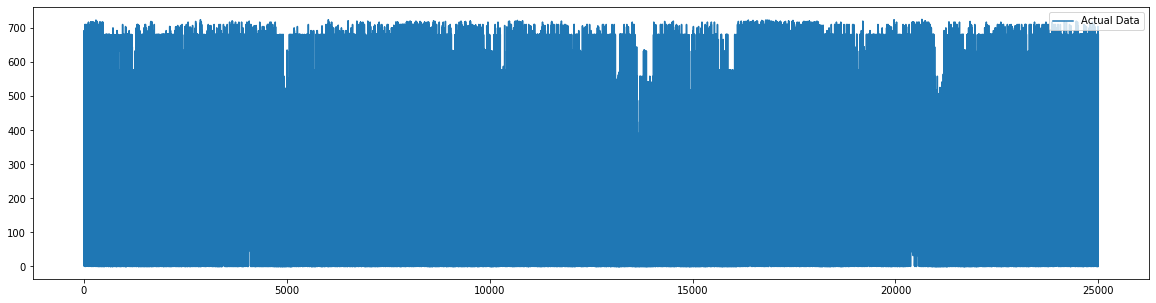

In [60]:
pattern1 = sax_all[1]
lbl = LabelEncoder()
lbl.fit(pattern1)
pattern = lbl.transform(pattern1)[100000:125000]

#Plot data
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(np.arange(len(pattern)),pattern, label="Actual Data")
legend = ax1.legend(loc='upper right')

In [61]:
m = 10
mp = matrixProfile.stomp(pattern,m)

In [43]:
def plot_motifs(mtfs, labels, ax):

    colori = 0
    colors = 'rgbcm'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + m,len(pattern)-1) for s in starts]
        ax.plot(starts, pattern[starts],  c +'o',  label=l)
        ax.plot(ends, pattern[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+m),pattern[nn:nn+m], c , linewidth=2)
        colori += 1

    ax.plot(pattern, 'k', linewidth=1, label="data")
    ax.legend()

In [88]:
mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=20, radius = 3)

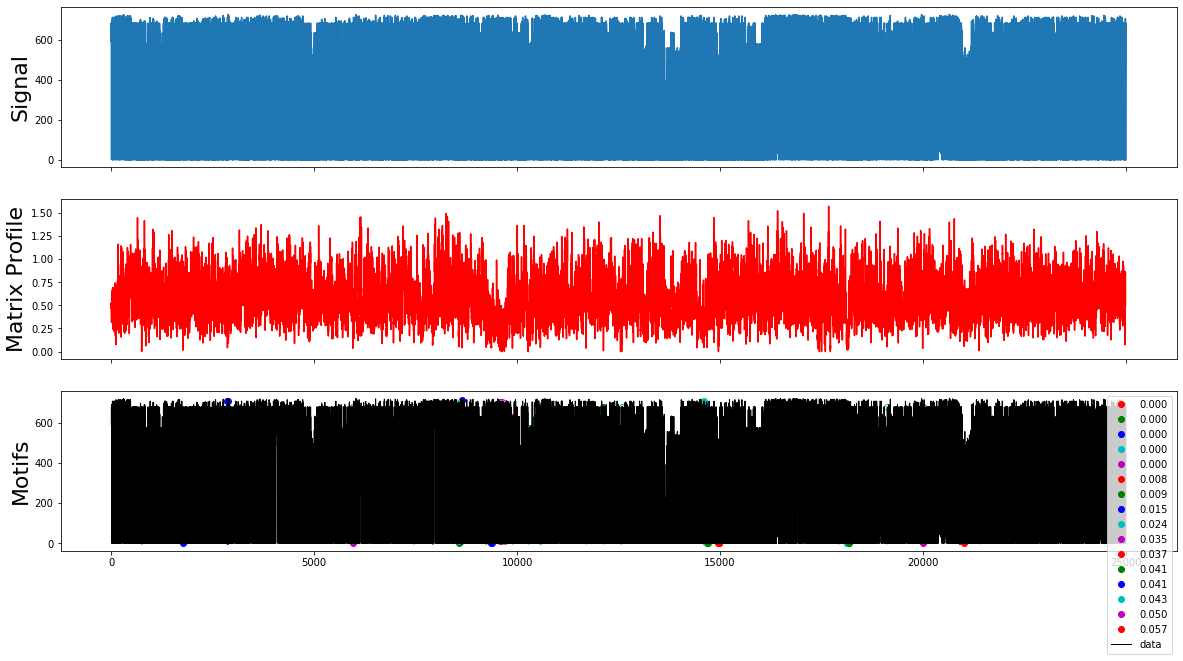

In [84]:

#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)

#Plot the Motifs
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.set_ylabel('Motifs', size=22)
#plt.xlim((0,100))
plt.show()

In [89]:
mtfs

[[9629, 14959, 17593, 17717],
 [10265, 12547],
 [17447, 17501],
 [10275, 12576],
 [747, 9615],
 [9583, 9637],
 [12126, 21381],
 [1765, 18137],
 [18123, 18158],
 [5949, 19992],
 [9884, 11701],
 [9364, 14433],
 [8573, 14685, 18166],
 [2862, 8644],
 [7917, 8564, 9238, 9687, 14603, 19110],
 [7454, 9556, 9725],
 [14965, 20909, 21014]]

In [90]:
for i in mtfs:
    for j in i:
        print(sax_all[1][100000+j:100000+j+10])
    print()

['p1', 'break1', 'p1', 'break1', 'p1', 'break1', 'p1', 'break1', 'p1', 'break1']
['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1']
['v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1']
['v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1']

['e1', 'c2', 'e1', 'c1', 'e1', 'c1', 'e1', 'c2', 'e1', 'c3']
['e1', 'c2', 'e1', 'c1', 'e1', 'c1', 'e1', 'c2', 'e1', 'c3']

['v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v2', 'e1', 'v1', 'e1']
['v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v2', 'e1', 'v1', 'e1']

['e1', 'c1', 'e1', 'c3', 'e1', 'c1', 'e1', 'c6', 'e1', 'c1']
['e1', 'c1', 'e1', 'c3', 'e1', 'c1', 'e1', 'c6', 'e1', 'c1']

['l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l2', 'c1', 'l1', 'c1']
['p1', 'break1', 'p1', 'break1', 'p1', 'break1', 'p2', 'break1', 'p1', 'break1']

['p1', 'break1', 'v1', 'p1', 'break1', 'p1', 'break1', 'p1', 'break1', 'v3']
['p1', 'break1', 'v1', 'p1', 'break1', 'p1', 'break1', 'p1', 'break1', 'v4']

['stop1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c2', 'l

In [77]:
import matrixprofile

In [82]:
??motifs.motifs

In [91]:
motif_d

[2.220446049250313e-16,
 2.220446049250313e-16,
 2.220446049250313e-16,
 6.664001874625056e-08,
 0.00017082197513038666,
 0.008332910980163387,
 0.009134908163193487,
 0.014800811702233374,
 0.024381714352655195,
 0.03548469782951327,
 0.03654421781990005,
 0.04040993713504107,
 0.04050637842226191,
 0.04106934766718588,
 0.04287495167944672,
 0.04996064375381518,
 0.05676565605055419]

## After updating workflows

In [7]:
super_4 = pd.read_csv('./superusers_lvl4_1.csv')
other_4 = pd.read_csv('./other_lvl4_1.csv')
s4 = super_4[['userID','session','category2']]
o4 = other_4[['userID','session','category2']]

In [8]:
sax_s4 = get_patterns(s4)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [14]:
most_common(sax_s4)

Total Number of patterns: 36
adddd, number of occurances:  226
['c16', 'v1', 's2', 'v1', 's2']
['break1', 'v1', 's2', 'e4', 'v2']
['c12', 'v1', 'e2', 'v1', 'e3']
['c1', 'v4', 'e1', 'v2', 's2']
['break1', 'v1', 'e4', 'v2', 'e1']
['c1', 's1', 'v1', 'z1', 's5']

bcbeb, number of occurances:  214
['s2', 'v1', 's2', 'v3', 's1']
['break1', 'c2', 'break1', 'l1', 'c1']
['break1', 'c133', 'break1', 'c29', 'break1']
['break1', 'c13', 'break1', 'c36', 'break1']
['break1', 'c128', 'break1', 'c55', 'break1']
['break1', 'c139', 'break1', 'c4', 'break1']

dddda, number of occurances:  253
['s2', 'v3', 's1', 'v1', 'c15']
['l1', 'v6', 's2', 'v1', 'break1']
['e2', 'c75', 'e1', 'c99', 'break1']
['e1', 'v2', 's2', 'v1', 'break1']
['v1', 's2', 'e4', 'v2', 'break1']
['e1', 'v1', 'e1', 'v1', 'c203']

dddad, number of occurances:  295
['v3', 's1', 'v1', 'c15', 'v1']
['e1', 's1', 'v3', 'break1', 'v3']
['v1', 'e3', 'v1', 'c19', 'v1']
['v2', 's2', 'v1', 'break1', 'v1']
['v3', 'e2', 'v3', 'break1', 'v1']
['l1', '

{'adddd': [0,
  40,
  124,
  131,
  228,
  236,
  354,
  1455,
  1495,
  2410,
  2455,
  2461,
  2555,
  2608,
  2984,
  3087,
  3320,
  3344,
  3390,
  3562,
  3571,
  3626,
  3691,
  3726,
  3783,
  3869,
  3899,
  3912,
  3962,
  3996,
  4017,
  4061,
  4139,
  4382,
  4430,
  4783,
  4790,
  4799,
  4854,
  4898,
  5034,
  5049,
  5362,
  5377,
  5404,
  5533,
  5872,
  5883,
  5897,
  6007,
  6113,
  6435,
  6497,
  6521,
  6851,
  8040,
  8363,
  8399,
  8416,
  8426,
  8436,
  8470,
  8480,
  8511,
  8523,
  8584,
  8595,
  8612,
  8655,
  8743,
  8756,
  8797,
  8869,
  8893,
  8955,
  8964,
  8972,
  8982,
  9017,
  9039,
  9092,
  9258,
  9271,
  9306,
  9316,
  9362,
  9375,
  9425,
  9465,
  9476,
  9599,
  9621,
  9667,
  9802,
  9979,
  10058,
  10069,
  10314,
  10393,
  10726,
  10818,
  10829,
  10867,
  10895,
  10902,
  10912,
  10956,
  10991,
  11008,
  11014,
  11049,
  11089,
  11104,
  11110,
  11115,
  11165,
  11198,
  11208,
  11220,
  11278,
  11340,
  11352

In [11]:
sax_o4 = get_patterns(o4)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [15]:
most_common(sax_o4)

Total Number of patterns: 178
aebea, number of occurances:  353
['c3', 'v1', 'c4', 'l1', 'c28']
['break1', 'v1', 'c2', 'v2', 'c1']
['break1', 'l1', 'c2', 'l1', 'c11']
['c2', 'l1', 'c3', 'l1', 'c2']
['c10', 'e2', 'c13', 'e1', 'c10']
['break1', 'l1', 'c2', 'l1', 'c10']

eadae, number of occurances:  431
['v1', 'c4', 'l1', 'c28', 'v1']
['v1', 'break1', 'c6', 'break1', 'v3']
['v1', 'c4', 's2', 'c3', 'v1']
['l1', 'c1', 'e2', 'c1', 'l1']
['v1', 'break1', 'c5', 'break1', 'v1']
['v1', 'e1', 's1', 'c9', 'v1']

beaeb, number of occurances:  348
['c4', 'l1', 'c28', 'v1', 'c34']
['c8', 'l1', 'c5', 'l1', 'c8']
['c8', 'l1', 'c7', 'l1', 'c8']
['c42', 's2', 'c3', 'v1', 'c54']
['c2', 'v1', 'c1', 'v1', 'c2']
['c3', 'e1', 'c2', 'l1', 'c3']

ebeca, number of occurances:  125
['l1', 'c28', 'v1', 'c34', 'break1']
['l1', 'c3', 'stop1', 'c44', 'break1']
['v1', 'c3', 'v1', 'c4', 'break1']
['l1', 'c2', 'l1', 'c3', 'break1']
['v2', 'c2', 'v1', 'c5', 'break1']
['l1', 'c19', 'l1', 'c34', 'break1']

dadeb, number o

{'aebea': [0,
  356,
  560,
  620,
  805,
  912,
  1426,
  1450,
  1830,
  1843,
  1885,
  1892,
  2172,
  2323,
  3017,
  3034,
  4229,
  4239,
  4247,
  4365,
  4435,
  5227,
  5455,
  5699,
  5703,
  6062,
  6321,
  6473,
  6969,
  6983,
  7046,
  7159,
  7361,
  7527,
  7768,
  9273,
  9354,
  9360,
  9557,
  9561,
  9884,
  10011,
  10437,
  10837,
  10855,
  10887,
  10937,
  10954,
  10993,
  11025,
  11029,
  11115,
  11249,
  11808,
  12556,
  12720,
  13935,
  14157,
  14183,
  14220,
  15516,
  16075,
  16105,
  16143,
  16186,
  16610,
  16807,
  17026,
  17030,
  17104,
  17112,
  17551,
  17978,
  17985,
  18357,
  18515,
  18610,
  19057,
  19136,
  19262,
  19317,
  19339,
  19396,
  19410,
  19414,
  19785,
  19819,
  19848,
  19893,
  20064,
  20091,
  20363,
  20881,
  20946,
  20956,
  21083,
  21321,
  21796,
  22175,
  22508,
  22524,
  22644,
  22860,
  22894,
  23008,
  23211,
  23883,
  23908,
  23912,
  23922,
  24007,
  24032,
  24038,
  24045,
  24064,
  242

In [10]:
super_3 = pd.read_csv('./superusers_lvl3_1.csv')
other_3 = pd.read_csv('./other_lvl3_1.csv')
s3 = super_3[['userID','session','category2']]
o3 = other_3[['userID','session','category2']]

C:\Users\mistr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
sax_s3 = get_patterns(s3)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [17]:
most_common(sax_s3)

Total Number of patterns: 41
dadcd, number of occurances:  456
['v1', 'c15', 'v1', 'c90', 'v2']
['s6', 'break1', 'v3', 'e11', 's2']
['z1', 'e19', 'z3', 'v1', 'z1']
['v2', 'break1', 'v1', 'c9', 'v1']
['s1', 'break1', 's1', 'e2', 's2']
['v2', 'e1', 'v1', 's4', 'v1']

aedea, number of occurances:  134
['c15', 'v1', 'c90', 'v2', 'break1']
['e1', 's1', 'l4', 's1', 'e2']
['break1', 's10', 'e1', 's2', 'break1']
['break1', 'v1', 'c9', 'v1', 'c120']
['e19', 'z3', 'v1', 'z1', 'e1']
['break1', 's9', 'e1', 'v1', 'break1']

dcdad, number of occurances:  399
['v1', 'c90', 'v2', 'break1', 'v1']
['s8', 'e2', 's4', 'break1', 's2']
['s1', 'e1', 's2', 'break1', 'e8']
['stop1', 'e1', 'v2', 'break1', 's15']
['z1', 'p1', 'z2', 'break1', 'z1']
['v1', 's2', 'v1', 'e1', 's6']

bebeb, number of occurances:  435
['break1', 'c9', 'break1', 'c9', 'break1']
['e1', 'z1', 'e1', 'z1', 'e1']
['e1', 'v1', 'e1', 'v1', 'e1']
['break1', 'c60', 'break1', 'c44', 'break1']
['break1', 's2', 'break1', 'e24', 'break1']
['e1', 'v

{'dadcd': [1,
  5,
  114,
  260,
  378,
  454,
  620,
  625,
  685,
  790,
  800,
  806,
  836,
  884,
  944,
  978,
  1001,
  1029,
  1059,
  1125,
  1246,
  1265,
  1313,
  1321,
  1354,
  1430,
  1489,
  1503,
  1510,
  1523,
  1530,
  1566,
  1604,
  1608,
  1636,
  1649,
  1653,
  1669,
  1754,
  1803,
  1813,
  1845,
  1850,
  1871,
  1883,
  1949,
  1956,
  1965,
  1989,
  2014,
  2579,
  2726,
  2747,
  2768,
  2772,
  2952,
  2967,
  2976,
  2980,
  2992,
  3036,
  3070,
  3078,
  3314,
  3330,
  3348,
  3592,
  3613,
  3619,
  3674,
  3743,
  3804,
  3928,
  3971,
  4096,
  4149,
  4176,
  4180,
  4194,
  4203,
  4237,
  4250,
  4265,
  4282,
  4305,
  4309,
  4336,
  4388,
  4398,
  4421,
  4437,
  4447,
  4456,
  4466,
  4473,
  4485,
  4506,
  4515,
  4522,
  4541,
  4546,
  4567,
  4579,
  4605,
  4633,
  4649,
  4681,
  4731,
  4769,
  4788,
  4797,
  4810,
  4818,
  4839,
  4856,
  4880,
  4968,
  5011,
  5026,
  5040,
  5049,
  5126,
  5194,
  5201,
  5240,
  5261,
  5

In [19]:
sax_o3 = get_patterns(o3)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [20]:
most_common(sax_o3)

Total Number of patterns: 97
adddd, number of occurances:  365
['c111', 'v1', 's1', 'e2', 'v5']
['c1', 'l2', 's2', 'e1', 'v1']
['c1', 's2', 'e1', 'v1', 'e1']
['c10', 'e1', 'v1', 'z1', 'v2']
['c1', 's2', 'v2', 'e1', 's2']
['c1', 'e1', 's2', 'e1', 's2']

dddda, number of occurances:  394
['s1', 'e2', 'v5', 'e5', 'c1']
['s2', 'e1', 'v1', 'l1', 'c2']
['v1', 's2', 'l1', 'v1', 'c1']
['e1', 'v1', 'z1', 'v2', 'c10']
['s1', 'l1', 's3', 'v7', 'break1']
['e1', 's2', 'e1', 's2', 'c1']

dddad, number of occurances:  588
['e2', 'v5', 'e5', 'c1', 'stop1']
['e1', 's2', 'v5', 'break1', 'e2']
['s2', 'e1', 'l1', 'c1', 's2']
['v1', 'z1', 'v2', 'c10', 'e1']
['e1', 'v1', 'l1', 'c2', 'v1']
['v1', 's2', 'v15', 'break1', 'e1']

eaeca, number of occurances:  104
['e5', 'c1', 'stop1', 'c37', 'break1']
['stop1', 'c16', 'stop1', 'c40', 'break1']
['l3', 'c1', 'v1', 'c3', 'break1']
['e1', 'c1', 'e1', 'c33', 'break1']
['v1', 'e1', 's6', 'l1', 'e1']
['v1', 'break1', 'l1', 'c26', 'break1']

aedea, number of occurances:

{'adddd': [0,
  26,
  111,
  321,
  368,
  383,
  408,
  481,
  583,
  592,
  601,
  642,
  691,
  703,
  717,
  855,
  871,
  884,
  921,
  928,
  1050,
  1059,
  1086,
  1096,
  1104,
  1144,
  1169,
  1189,
  1251,
  1319,
  1489,
  1582,
  1957,
  2258,
  2268,
  2302,
  2591,
  2596,
  2648,
  2658,
  2674,
  2862,
  2965,
  2978,
  2985,
  2991,
  3004,
  3012,
  3050,
  3065,
  3072,
  3081,
  3159,
  3212,
  3418,
  3604,
  3637,
  3722,
  4069,
  4126,
  4412,
  4456,
  4479,
  4489,
  4568,
  4602,
  4637,
  4648,
  4667,
  4674,
  4703,
  5467,
  5475,
  5561,
  5698,
  5844,
  6017,
  6239,
  6314,
  6374,
  6465,
  6671,
  6784,
  6973,
  7224,
  7233,
  7344,
  7587,
  7630,
  7768,
  7931,
  8030,
  8056,
  8119,
  8144,
  8466,
  8573,
  8593,
  8873,
  8972,
  9034,
  9068,
  9771,
  10057,
  10253,
  10274,
  10335,
  10432,
  10442,
  10510,
  10541,
  11158,
  11182,
  11210,
  11462,
  11560,
  11766,
  11774,
  11793,
  11799,
  11822,
  11837,
  12015,
  12075,
 

In [18]:
super_2 = pd.read_csv('./superusers_lvl2_1.csv')
other_2 = pd.read_csv('./other_lvl2_1.csv')
s2 = super_2[['userID','session','category2']]
o2 = other_2[['userID','session','category2']]

In [21]:
sax_s2 = get_patterns(s2)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
most_common(sax_s2,15)

Total Number of patterns: 7
bebeb, number of occurances:  55
['break1', 'c53', 'break1', 'c8', 'break1']
['break1', 'c1', 'break1', 'c1', 'break1']
['break1', 'c2', 'break1', 'c3', 'break1']
['break1', 'c31', 'break1', 'c40', 'break1']
['break1', 'c1', 'break1', 'c1', 'break1']
['break1', 'c26', 'break1', 'c3', 'break1']

bebcb, number of occurances:  20
['break1', 'c8', 'break1', 'c17', 'break1']
['break1', 'c3', 'break1', 'c109', 'break1']
['break1', 'c5', 'break1', 'c12', 'break1']
['break1', 'c5', 'break1', 'c120', 'break1']
['break1', 'c6', 'break1', 'c13', 'break1']
['break1', 'c49', 'break1', 'c14', 'break1']

bdbeb, number of occurances:  34
['break1', 'c17', 'break1', 'c5', 'break1']
['break1', 'c123', 'break1', 'c158', 'break1']
['break1', 'c19', 'break1', 'c47', 'break1']
['break1', 'c4', 'break1', 'c8', 'break1']
['break1', 'c123', 'break1', 'c18', 'break1']
['break1', 'c15', 'break1', 'c2', 'break1']

bebdb, number of occurances:  30
['break1', 'c5', 'break1', 'c2', 'break

{'bebeb': [2,
  32,
  42,
  52,
  62,
  70,
  72,
  74,
  76,
  80,
  90,
  102,
  148,
  185,
  255,
  257,
  271,
  311,
  313,
  335,
  383,
  391,
  403,
  405,
  423,
  431,
  435,
  441,
  445,
  447,
  453,
  459,
  498,
  518,
  520,
  522,
  534,
  542,
  554,
  568,
  570,
  572,
  578,
  580,
  582,
  584,
  586,
  588,
  594,
  596,
  604,
  610,
  614,
  616,
  628],
 'bebcb': [4,
  56,
  110,
  261,
  263,
  277,
  307,
  379,
  437,
  461,
  465,
  564,
  608,
  618,
  624,
  632,
  636,
  644,
  648,
  658],
 'bdbeb': [6,
  48,
  54,
  58,
  92,
  112,
  269,
  309,
  385,
  387,
  395,
  409,
  411,
  415,
  419,
  433,
  443,
  455,
  457,
  473,
  516,
  536,
  540,
  550,
  552,
  576,
  592,
  606,
  630,
  634,
  642,
  650,
  660,
  662],
 'bebdb': [8,
  30,
  38,
  40,
  44,
  50,
  100,
  108,
  267,
  275,
  333,
  389,
  393,
  397,
  407,
  413,
  417,
  429,
  469,
  471,
  496,
  532,
  538,
  544,
  560,
  574,
  590,
  598,
  622,
  638],
 'bbbeb': [24,


In [28]:
sax_o2 = get_patterns(o2)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [29]:
most_common(sax_o2)

Total Number of patterns: 68
dcdad, number of occurances:  846
['stop1', 'c8', 'e5', 'c177', 's2']
['stop1', 'c50', 'l2', 'c1', 'e1']
['e1', 'c8', 'l1', 'c13', 'stop1']
['l1', 'c39', 'e1', 'c1', 's3']
['e1', 'c8', 'stop1', 'c2', 'stop1']
['l1', 'c69', 'stop1', 'c128', 'stop1']

cdadd, number of occurances:  113
['c8', 'e5', 'c177', 's2', 'e2']
['c7', 's2', 'c1', 'v1', 's2']
['c6', 'l1', 'c12', 'l1', 'c69']
['c73', 'e1', 'c1', 'v1', 'e1']
['e1', 's2', 'c3', 'v1', 's2']
['c6', 'e1', 'c11', 'l1', 'v4']

ceaea, number of occurances:  339
['c34', 'z1', 'break1', 'l1', 'c1']
['c255', 'stop1', 'c136', 'stop1', 'c1']
['c23', 'v1', 'c1', 's1', 'break1']
['l1', 's6', 'e1', 's2', 'e1']
['c3', 'l1', 'c14', 'l1', 'c16']
['c5', 'stop1', 'c19', 'stop1', 'c17']

eadad, number of occurances:  267
['z1', 'break1', 'l1', 'c1', 'l1']
['v8', 'break1', 'v1', 'break1', 's2']
['v1', 'c1', 's2', 'c1', 's2']
['s1', 'c30', 'l1', 'c39', 'e1']
['v1', 'e1', 's2', 'e1', 's2']
['v4', 'break1', 's2', 'break1', 's7']



{'dcdad': [1,
  41,
  90,
  98,
  156,
  160,
  164,
  275,
  289,
  312,
  340,
  346,
  390,
  517,
  523,
  703,
  732,
  768,
  780,
  784,
  816,
  881,
  947,
  1039,
  1110,
  1146,
  1158,
  1768,
  1790,
  1869,
  1877,
  1883,
  1902,
  1915,
  1939,
  1990,
  2002,
  2051,
  2076,
  2196,
  2257,
  2378,
  2394,
  2421,
  2429,
  2453,
  2467,
  2513,
  2526,
  2618,
  2676,
  2708,
  2716,
  2770,
  2824,
  2888,
  2892,
  2920,
  2942,
  2965,
  3005,
  3056,
  3154,
  3201,
  3205,
  3225,
  3229,
  3323,
  3329,
  3343,
  3397,
  3413,
  3451,
  3482,
  3537,
  3609,
  3630,
  3697,
  3724,
  3746,
  3798,
  3883,
  3889,
  4058,
  4078,
  4105,
  4160,
  4226,
  4230,
  4280,
  4297,
  4334,
  4339,
  4365,
  4533,
  4593,
  4626,
  4714,
  4724,
  4775,
  4804,
  4835,
  4841,
  4868,
  4941,
  4965,
  5015,
  5023,
  5027,
  5188,
  5260,
  5285,
  5293,
  5305,
  5315,
  5444,
  5508,
  5605,
  5632,
  5634,
  5664,
  5674,
  5681,
  5748,
  5844,
  5856,
  5862,
  5

In [30]:
super_1 = pd.read_csv('./superusers_lvl1_1.csv')
other_1 = pd.read_csv('./other_lvl1_1.csv')
s1 = super_1[['userID','session','category2']]
o1 = other_1[['userID','session','category2']]

In [31]:
sax_s1 = get_patterns(s1)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [33]:
most_common(sax_s1,20)

Total Number of patterns: 5
bebdb, number of occurances:  24
['break1', 'c373', 'break1', 'c20', 'break1']
['break1', 'c4', 'break1', 'c2', 'break1']
['break1', 'c7', 'break1', 'c30', 'break1']
['break1', 'c5', 'break1', 'c3', 'break1']
['break1', 'c2', 'break1', 'c13', 'break1']
['break1', 'c52', 'break1', 'c3', 'break1']

bebbb, number of occurances:  33
['break1', 'c20', 'break1', 'c1', 'break1']
['break1', 'c4', 'break1', 'c10', 'break1']
['break1', 'c2', 'break1', 'c1', 'break1']
['break1', 'c3', 'break1', 'c1', 'break1']
['break1', 'c9', 'break1', 'c115', 'break1']
['break1', 'c8', 'break1', 'c1', 'break1']

bbbeb, number of occurances:  31
['break1', 'c1', 'break1', 'c20', 'break1']
['break1', 'c115', 'break1', 'c7', 'break1']
['break1', 'c10', 'break1', 'c20', 'break1']
['break1', 'c1', 'break1', 'c91', 'break1']
['break1', 'c11', 'break1', 'c7', 'break1']
['break1', 'c100', 'break1', 'c9', 'break1']

bebeb, number of occurances:  56
['break1', 'c20', 'break1', 'c24', 'break1']

{'bebdb': [2,
  86,
  240,
  246,
  330,
  332,
  384,
  388,
  414,
  505,
  525,
  537,
  551,
  591,
  769,
  775,
  787,
  789,
  797,
  805,
  860,
  862,
  891,
  897],
 'bebbb': [4,
  38,
  48,
  52,
  58,
  64,
  68,
  78,
  88,
  100,
  104,
  112,
  250,
  254,
  394,
  410,
  420,
  479,
  511,
  515,
  519,
  539,
  571,
  577,
  727,
  731,
  753,
  763,
  779,
  793,
  819,
  831,
  845],
 'bbbeb': [6,
  40,
  50,
  60,
  66,
  70,
  80,
  96,
  102,
  106,
  236,
  252,
  256,
  396,
  422,
  487,
  513,
  517,
  521,
  541,
  579,
  729,
  733,
  745,
  755,
  765,
  783,
  795,
  801,
  817,
  823],
 'bebeb': [8,
  36,
  46,
  72,
  82,
  84,
  90,
  92,
  94,
  98,
  108,
  120,
  126,
  198,
  242,
  244,
  248,
  258,
  260,
  268,
  301,
  398,
  400,
  408,
  416,
  523,
  529,
  531,
  543,
  549,
  553,
  561,
  563,
  581,
  585,
  587,
  589,
  599,
  737,
  747,
  749,
  751,
  759,
  761,
  767,
  771,
  781,
  785,
  803,
  807,
  809,
  825,
  827,
  829,


In [34]:
sax_o1 = get_patterns(o1)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mistr\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This

In [35]:
most_common(sax_o1)

Total Number of patterns: 79
dddad, number of occurances:  761
['e1', 'stop1', 'l1', 'break1', 's1']
['v1', 's2', 'v1', 'break1', 'v1']
['l1', 's1', 'v1', 'c2', 'l1']
['e1', 'l1', 'v2', 'break1', 'v1']
['v2', 's1', 'v1', 'break1', 'v1']
['v1', 'l1', 's2', 'c3', 'v1']

ddadd, number of occurances:  319
['stop1', 'l1', 'break1', 's1', 'e2']
['e1', 'v1', 'break1', 'v2', 's1']
['e1', 'v1', 'break1', 'v2', 'e2']
['v5', 's1', 'break1', 'v1', 'e3']
['s1', 'v1', 'break1', 'v1', 's2']
['v2', 'e2', 'break1', 'v2', 'l1']

daddd, number of occurances:  796
['l1', 'break1', 's1', 'e2', 'stop1']
['v1', 'break1', 'v2', 's1', 'v1']
['s2', 'break1', 'v3', 'e1', 'l2']
['v1', 'c1', 'e1', 'l1', 'v2']
['s2', 'e1', 's3', 'v1', 's3']
['e2', 'break1', 'v2', 'l1', 's1']

dcdad, number of occurances:  1676
['s1', 'e2', 'stop1', 'c39', 'stop1']
['v2', 'e1', 's1', 'c2', 'v1']
['stop1', 'c9', 'stop1', 'c24', 'stop1']
['stop1', 'c59', 'stop1', 'c19', 'stop1']
['v1', 'e1', 's2', 'break1', 'v3']
['stop1', 'c89', 'sto

{'dddad': [0,
  130,
  211,
  216,
  258,
  278,
  286,
  319,
  328,
  337,
  381,
  386,
  397,
  569,
  664,
  781,
  900,
  904,
  913,
  921,
  927,
  937,
  947,
  952,
  956,
  968,
  981,
  1008,
  1016,
  1030,
  1047,
  1066,
  1074,
  1088,
  1118,
  1150,
  1170,
  1179,
  1186,
  1196,
  1207,
  1211,
  1215,
  1219,
  1227,
  1243,
  1267,
  1271,
  1289,
  1310,
  1322,
  1329,
  1350,
  1354,
  1364,
  1510,
  1663,
  1689,
  1716,
  1893,
  1928,
  2033,
  2099,
  2140,
  2164,
  2235,
  2274,
  2360,
  2418,
  2425,
  2429,
  2452,
  2583,
  2612,
  2706,
  2826,
  2891,
  2937,
  3030,
  3045,
  3049,
  3080,
  3096,
  3240,
  3248,
  3275,
  3364,
  3448,
  3464,
  3491,
  3739,
  3909,
  3916,
  3987,
  4053,
  4058,
  4068,
  4163,
  4246,
  4307,
  4335,
  4400,
  4472,
  4479,
  4498,
  4512,
  4575,
  4607,
  4769,
  4795,
  4800,
  4853,
  4874,
  4888,
  4898,
  4931,
  4937,
  5140,
  5172,
  5214,
  5417,
  5555,
  5569,
  5680,
  5720,
  5917,
  6042,
  61

## MatrixProfile for exact motifs

In [44]:
def plot_motifs(mtfs, labels, ax, m, pattern):

    colori = 0
    colors = 'rgbcm'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + m,len(pattern)-1) for s in starts]
        ax.plot(starts, pattern[starts],  c +'o',  label=l)
        ax.plot(ends, pattern[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+m),pattern[nn:nn+m], c , linewidth=2)
        colori += 1

    ax.plot(pattern, 'k', linewidth=1, label="data")
    ax.legend()

In [45]:
def get_exact_patterns(sax):
    pattern1 = sax[1]
    lbl = LabelEncoder()
    lbl.fit(pattern1)
    pattern = lbl.transform(pattern1)

    #Plot data
    #fig, ax1 = plt.subplots(figsize=(20,5))
    #ax1.plot(np.arange(len(pattern)),pattern, label="Actual Data")
    #legend = ax1.legend(loc='upper right')
    
    m = 10
    mp = matrixProfile.stomp(pattern,m)
    mtfs ,motif_d  = motifs.motifs(pattern, mp, max_motifs=20, radius = 3)
    
    
    #Append np.nan to Matrix profile to enable plotting against raw data
    mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

    #Plot the signal data
    fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
    ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
    ax1.set_ylabel('Signal', size=22)

    #Plot the Matrix Profile
    ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
    ax2.set_ylabel('Matrix Profile', size=22)

    #Plot the Motifs
    plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3,m,pattern)
    ax3.set_ylabel('Motifs', size=22)
    #plt.xlim((0,100))
    plt.show()
    
    for i in mtfs:
        for j in i:
            print(sax[1][j:j+10])
        print()

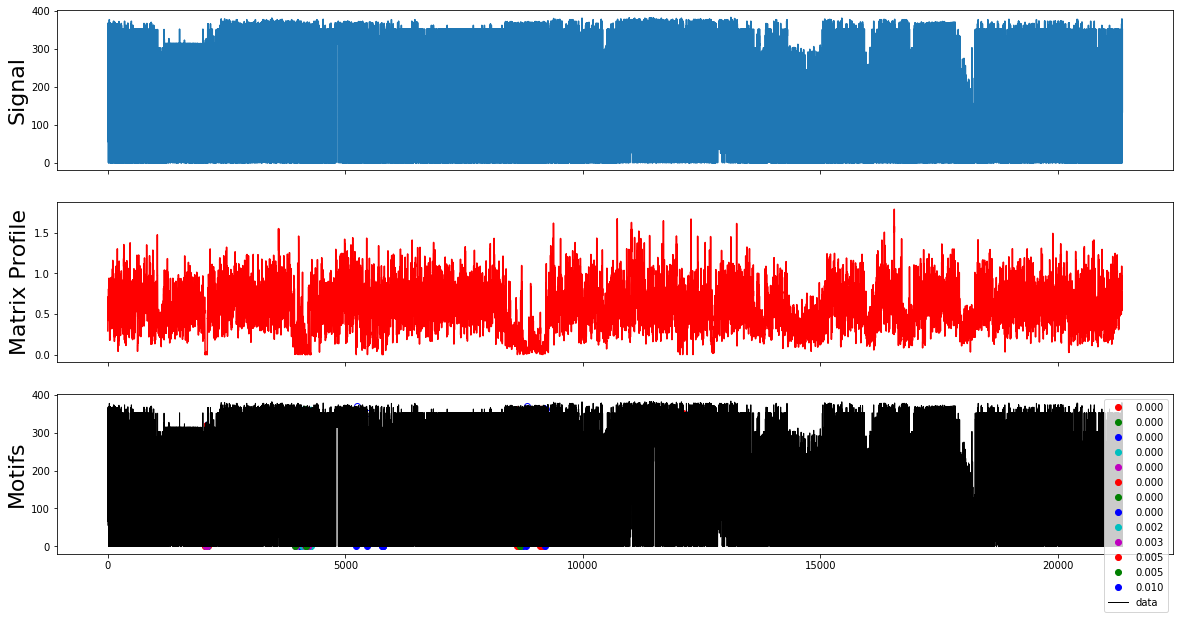

['break1', 'e1', 'break1', 'e1', 'break1', 'e1', 'break1', 'e2', 'break1', 'e2']
['break1', 'e1', 'break1', 'e1', 'break1', 'e1', 'break1', 'e2', 'break1', 'e2']
['break1', 'e1', 'break1', 'e1', 'break1', 'e1', 'break1', 'e2', 'break1', 'e2']

['v1', 'break1', 'v1', 'break1', 'v2', 'break1', 'v1', 'break1', 'v1', 'break1']
['v1', 'break1', 'v1', 'break1', 'v2', 'break1', 'v1', 'break1', 'v1', 'break1']
['v1', 'break1', 'v1', 'break1', 'v2', 'break1', 'v1', 'break1', 'v1', 'break1']

['break1', 'v1', 'break1', 'v1', 'break1', 'v1', 'break1', 'v1', 'break1', 'v1']
['break1', 'v1', 'break1', 'v1', 'break1', 'v1', 'break1', 'v1', 'break1', 'v1']
['break1', 'c50', 'break1', 'c50', 'break1', 'c50', 'break1', 'c50', 'break1', 'c50']
['break1', 'c25', 'break1', 'c25', 'break1', 'c25', 'break1', 'c25', 'break1', 'c25']
['break1', 'c25', 'break1', 'c25', 'break1', 'c25', 'break1', 'c25', 'break1', 'c25']
['break1', 'c25', 'break1', 'c25', 'break1', 'c25', 'break1', 'c25', 'break1', 'c25']
['brea

In [46]:
get_exact_patterns(sax_s4)

In [47]:
import gc

In [48]:
gc.collect()

12739

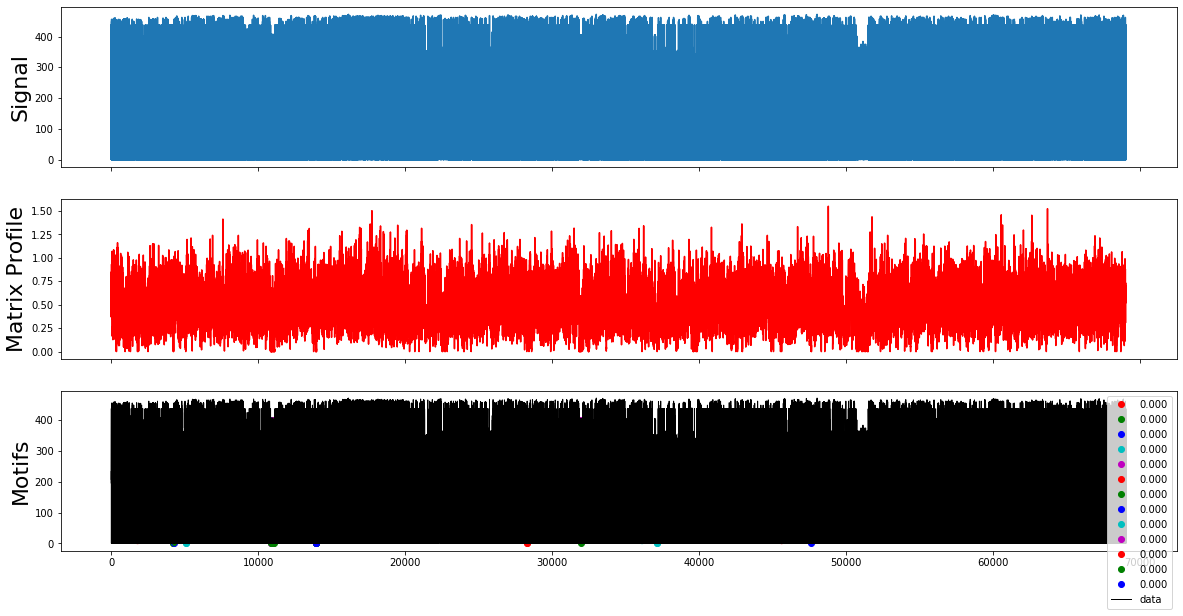

['l1', 'c1', 'l1', 'c1', 'l1', 'c3', 'l1', 'c2', 'l1', 'c1']
['l1', 'c1', 'l1', 'c1', 'l1', 'c3', 'l1', 'c2', 'l1', 'c1']

['c1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l2', 'c1', 'l1']
['c1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l2', 'c1', 'l1']
['c1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l2', 'c1', 'l1']
['c1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l2', 'c1', 'l1']

['c2', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c2', 'l1']
['c2', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c2', 'l1']

['break1', 'c4', 'break1', 'c4', 'break1', 'c8', 'break1', 'c12', 'break1', 'c3']
['break1', 'c4', 'break1', 'c4', 'break1', 'c8', 'break1', 'c12', 'break1', 'c3']

['l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'break1', 'l1']
['l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1', 'break1', 'l1']

['l1', 'c1', 'l1', 'c2', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1']
['l1', 'c1', 'l1', 'c2', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1']
['l1', 'c1', 'l1', 'c2', 'l1', 'c1', 'l1', 'c1', 'l1', 'c1']
['l1', 'c1', 'l1', 'c2', 'l1',

In [49]:
get_exact_patterns(sax_o4)

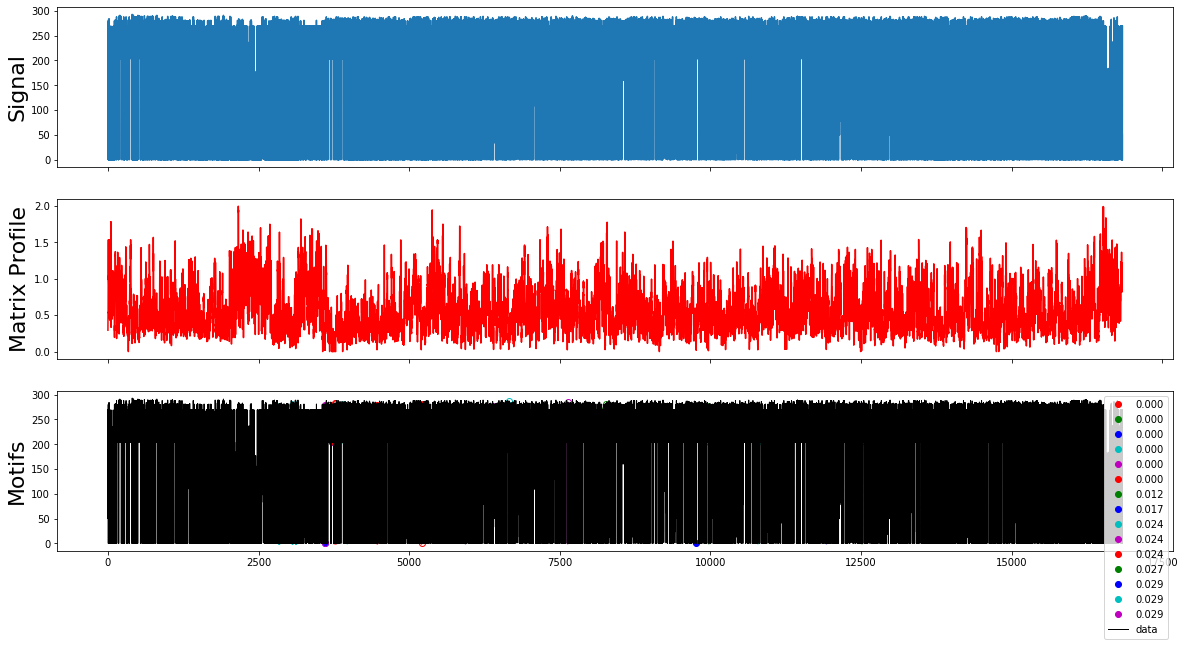

['v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1']
['v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1']

['e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v2', 'e1', 'v1']
['e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v2', 'e1', 'v1']

['e1', 'v2', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1']
['e1', 'v2', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1']

['v1', 'e1', 'v1', 's1', 'v1', 'e2', 'v3', 's1', 'v1', 'e2']
['v1', 'e1', 'v1', 's1', 'v1', 'e2', 'v3', 's1', 'v1', 'e2']

['e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1']
['s1', 'v2', 's1', 'v2', 's1', 'v2', 's1', 'v2', 's1', 'v2']

['e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'break1']
['e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'v1', 'e1', 'break1']

['s1', 'v2', 's1', 'v2', 'e1', 's2', 'v1', 'break1', 'e1', 'v1']
['s1', 'v2', 's1', 'v3', 'e1', 's2', 'v1', 'break1', 'e1', 'v1']

['break1', 'v1', 'e1', 'v2', 'e1', 'v1', 'e1', 'v4', 'e1', 'v2']
['break1', 'v1', 'e1', 'v2', 'e1', 'v1', 'e1', 'v3', 'e1',

In [50]:
get_exact_patterns(sax_s3)

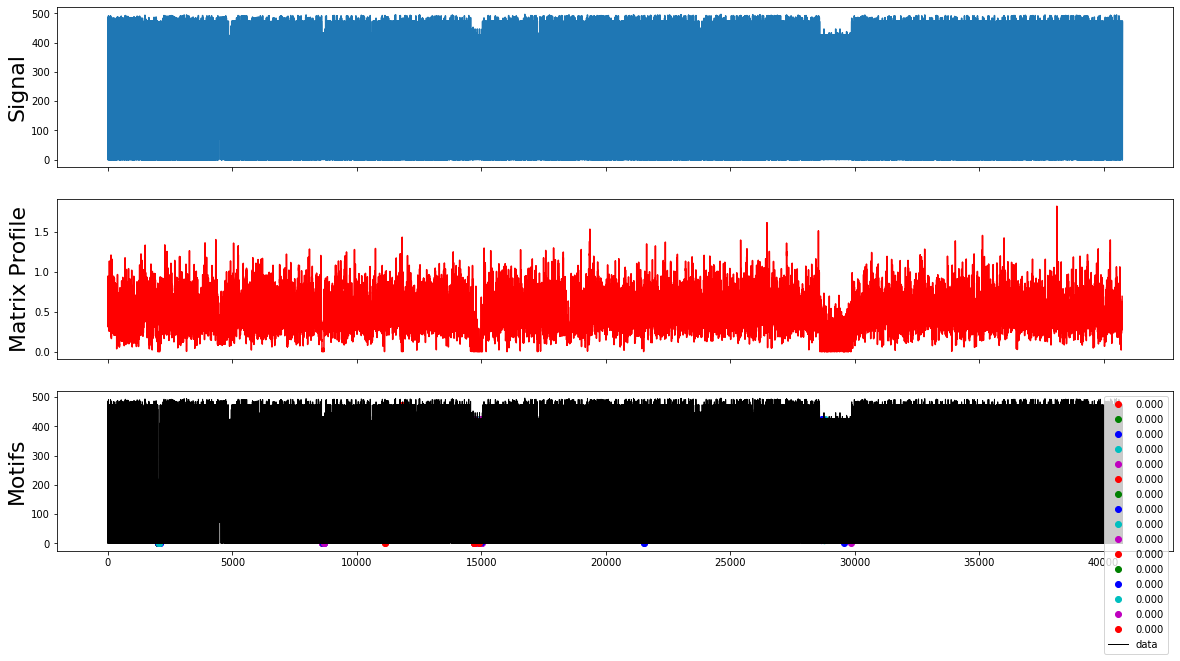

['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1']
['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1']
['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1']

['break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1']
['break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1']

['break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1']
['break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1']
['c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1']
['c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1']
['c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1']
['c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1']
['c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1']
['c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1']
['c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1']

['c

In [51]:
get_exact_patterns(sax_o3)

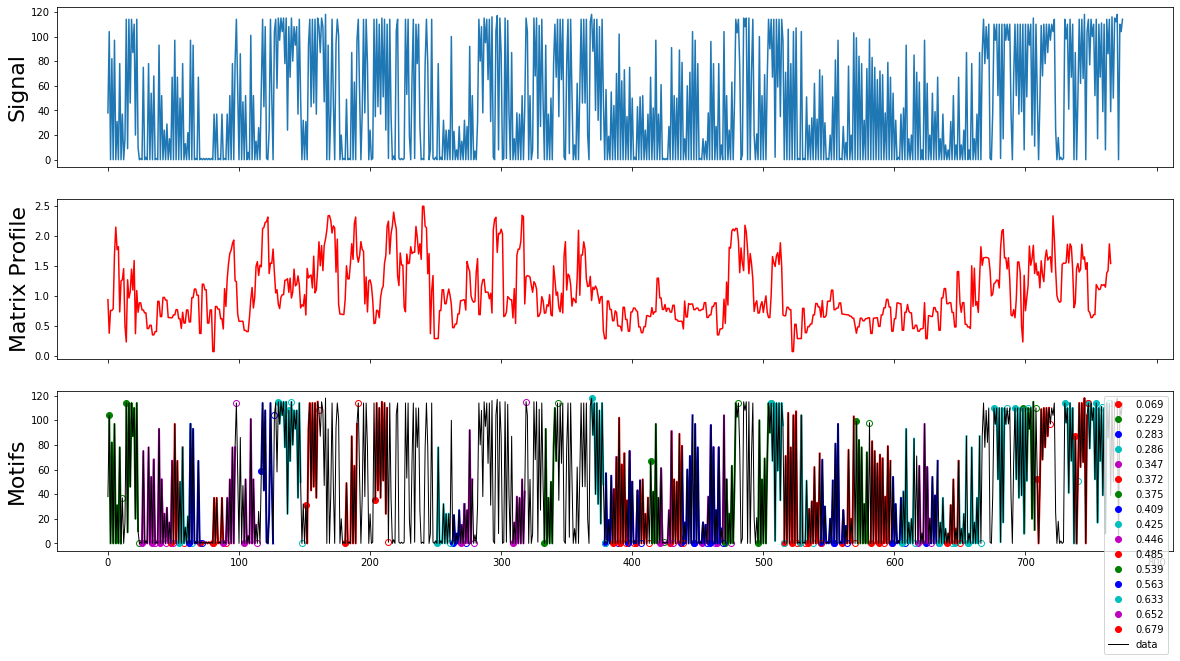

['break1', 'c2', 'break1', 'c2', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1']
['break1', 'c9', 'break1', 'c96', 'break1', 'c1', 'break1', 'c9', 'break1', 'c1']

['stop1', 'c110', 'stop1', 'c25', 'stop1', 'c6', 'l1', 'c14', 'stop1', 'c1104']
['l1', 'c11', 'l1', 'c29', 'l1', 'c7', 'l1', 'c14', 'v1', 'c114']

['break1', 'c149', 'break1', 'c11', 'break1', 'c16', 'break1', 'c123', 'break1', 'c18']
['break1', 'c322', 'break1', 'c139', 'break1', 'c317', 'break1', 'c242', 'break1', 'c42']
['break1', 'c50', 'break1', 'c13', 'break1', 'c35', 'break1', 'c43', 'break1', 'c9']
['break1', 'c37', 'break1', 'c14', 'break1', 'c31', 'break1', 'c21', 'break1', 'c4']

['break1', 'c5', 'break1', 'c10', 'break1', 'c18', 'break1', 'c15', 'break1', 'c15']
['break1', 'c9', 'break1', 'c1', 'break1', 'c29', 'break1', 'c160', 'break1', 'c185']

['break1', 'c40', 'break1', 'c1', 'break1', 'c7', 'break1', 'c3', 'break1', 'c15']
['break1', 'c3', 'break1', 'c108', 'break1', 'c86', 'break1', 'c3', 'break1', 'c123']

In [53]:
get_exact_patterns(sax_s2)

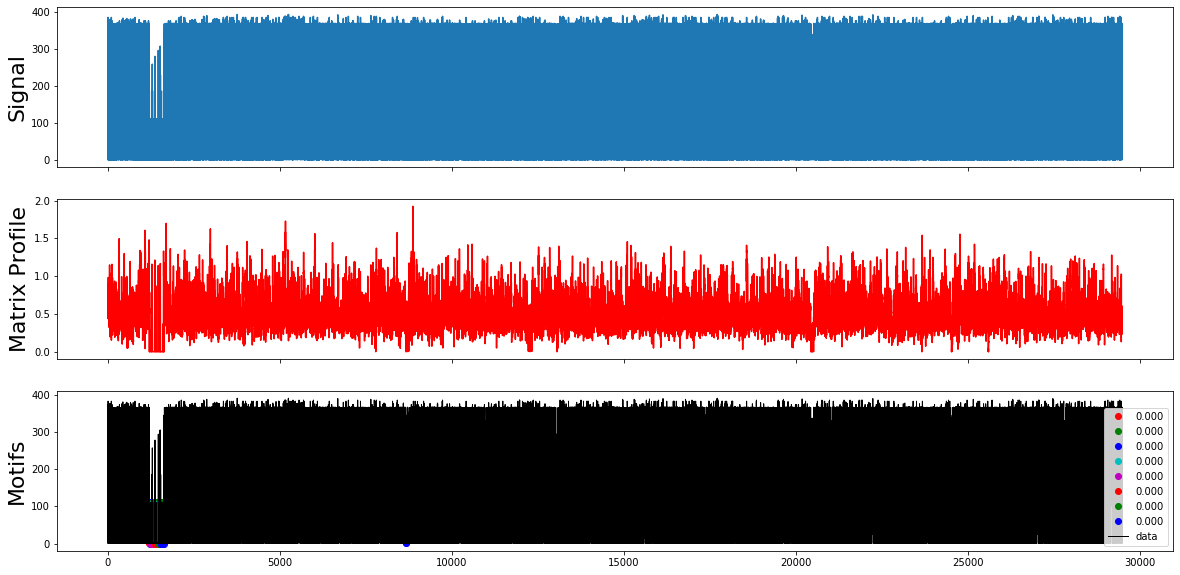

['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1']
['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1']
['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1']

['c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1']
['c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1']
['c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1']
['c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1']
['c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1']
['c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c1', 'break1']

['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1']
['c1', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1']

['break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1', 'c1', 'break1', 'c2']
['break1', 'c1', 'break1'

In [54]:
get_exact_patterns(sax_o2)

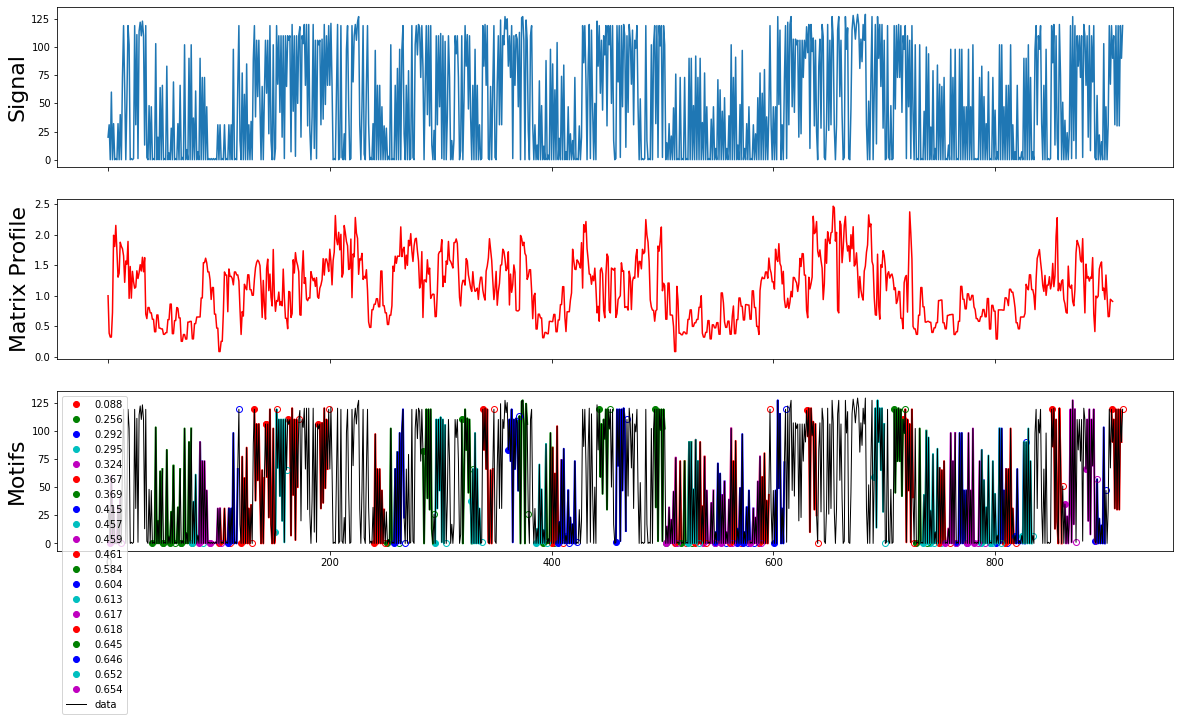

['break1', 'c2', 'break1', 'c1', 'break1', 'c2', 'break1', 'c1', 'break1', 'c2']
['break1', 'c510', 'break1', 'c1', 'break1', 'c5', 'break1', 'c1', 'break1', 'c5']

['break1', 'c10', 'break1', 'c9', 'break1', 'c115', 'break1', 'c7', 'break1', 'c9']
['break1', 'c100', 'break1', 'c9', 'break1', 'c1', 'break1', 'c4', 'break1', 'c58']
['break1', 'c129', 'break1', 'c68', 'break1', 'c101', 'break1', 'c8', 'break1', 'c62']
['break1', 'c1', 'break1', 'c5', 'break1', 'c1', 'break1', 'c7', 'break1', 'c7']

['break1', 'c12', 'break1', 'c46', 'break1', 'c38', 'break1', 'c27', 'break1', 'c34']
['break1', 'c1', 'break1', 'c8', 'break1', 'c8', 'break1', 'c3', 'break1', 'c3']
['break1', 'c11', 'break1', 'c9', 'break1', 'c9', 'break1', 'c3', 'break1', 'c4']

['break1', 'c221', 'break1', 'c377', 'break1', 'c11', 'break1', 'c7', 'break1', 'c5']
['break1', 'c180', 'break1', 'c56', 'break1', 'c12', 'break1', 'c60', 'break1', 'c41']

['break1', 'c373', 'break1', 'c20', 'break1', 'c1', 'break1', 'c20', 'brea

In [55]:
get_exact_patterns(sax_s1)

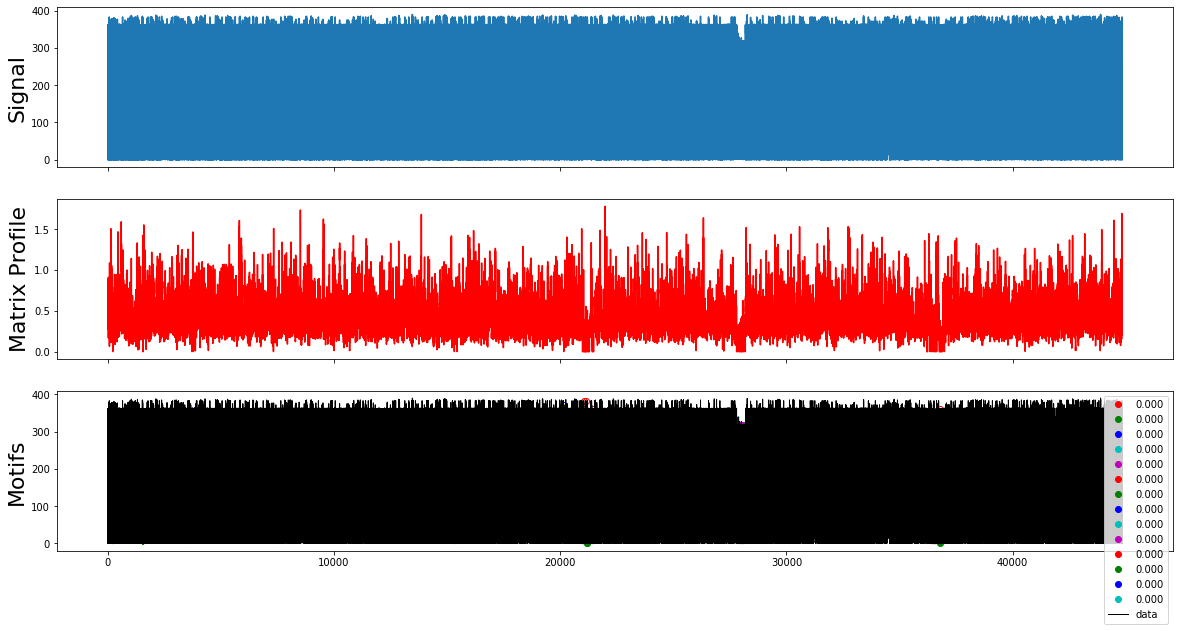

['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1', 'e1', 'c1']
['e1', 'c2', 'e1', 'c2', 'e1', 'c2', 'e1', 'c2', 'e1', 'c2']
['e1', 'c2', 'e1', 'c2',

In [56]:
get_exact_patterns(sax_o1)